In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
data = np.load('../data/raw/fashion_train.npy')
Y = data[:, -1]
X = data[:, :-1]
unique_labels = np.unique(Y)

In [121]:
X.shape

(10000, 784)

### PCA Analysis and reconstruction

TODO:
* Create a heatmap of most important pixels according to PCA, using cosine correlations. Like, one image.
* Create a template by averaging images within each class. Then, do reconstruction. Then for each image obtain only one value using pearson correlation.
* Other way: do reconstruction of each image and then do the templates. Then, for each image obtain only one values using pearson correlation.
* See the correlation between these two :)
* reconstruct several images, present them according to a few PCA thresholds. (i propose 1, 10, 71, 500, 784)
* do the 3d Biplot (even though it's useless xd)

Heatmap of most important pixels according to PCA

In [90]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA(n_components=71)
pca.fit(X)
pca_coordinates = pca.transform(X)
reduced_original_coordinates = pca.inverse_transform(pca_coordinates)

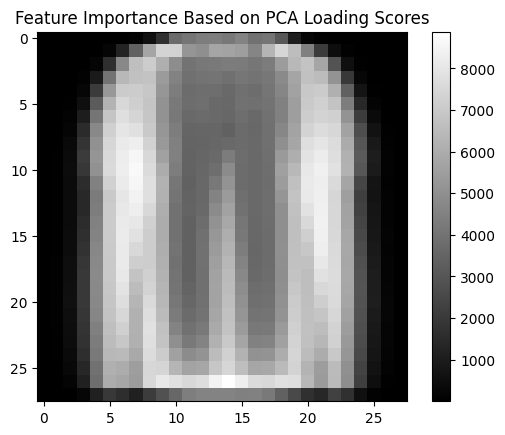

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load data
data = np.load('../data/raw/fashion_train.npy')
Y = data[:, -1]
X = data[:, :-1]

# Perform PCA
pca = PCA(n_components=71)
pca.fit(X)

# Compute loading scores
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)[np.newaxis, :]

# Compute total variance contribution for each feature
total_feature_variance = np.sum(loadings**2, axis=1)

# Visualize
plt.imshow(total_feature_variance.reshape((28,28)), cmap='gray')
plt.title('Feature Importance Based on PCA Loading Scores')
plt.colorbar()
plt.show()


I think it confirms that methods focused on contour based methods might be the best, because most helpful information is around.

Secondly, there is a clear shape of trousers in the middle. I don't think it's very significant - though it means that most probably trousers are 'within' other clothes images and could be detected based on smallest area, and perhaps this white vertical line in the middle.

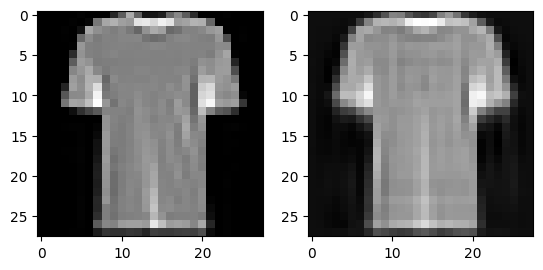

In [93]:
test_img = X[0, :].reshape((28,28))
test_img2 = reduced_original_coordinates[0, :].reshape((28,28))

_,ax = plt.subplots(ncols=2)
ax[0].imshow(test_img, cmap='gray')
ax[1].imshow(test_img2, cmap='gray')
plt.show()

# as we see, for 71 parameters there is almost no change! that's so great :)

### Some basic metrics for each of the classes - variance, mean, std of pixels within class.

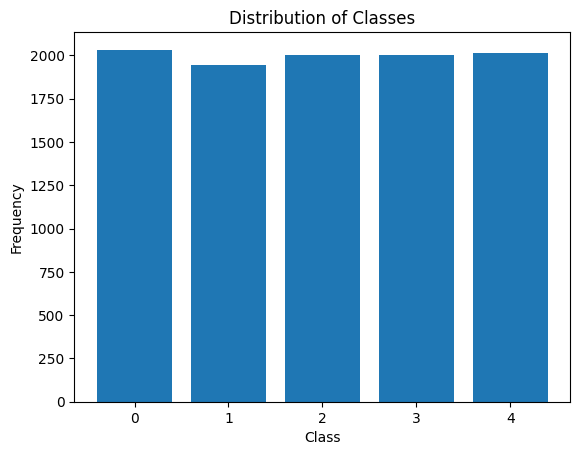

In [94]:
# Show the distribution of classes
unique, counts = np.unique(Y, return_counts=True)
plt.bar(unique, counts)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes')
plt.show()


In [95]:

# Compute the metrics for 'average' image within each class
class_metrics = {}
for label in unique:
    class_images = X[Y == label]
    average_image = np.mean(class_images, axis=0)
    variance = np.var(average_image)
    mean = np.mean(average_image)
    std = np.std(average_image)
    class_metrics[label] = {'mean': mean, 'variance': variance, 'std': std}

# format as a nice table for display
print('Class\tMean\tVariance\tStandard Deviation')
for label, metrics in class_metrics.items():
    print('{} \t{:.2f} \t{:.2f} \t{:.2f}'.format(label, metrics['mean'], metrics['variance'], metrics['std']))



Class	Mean	Variance	Standard Deviation
0 	81.94 	4479.21 	66.93
1 	56.91 	5579.82 	74.70
2 	95.86 	4414.25 	66.44
3 	65.97 	5147.69 	71.75
4 	83.81 	3379.78 	58.14


In [157]:
[X_mean[Y == label] for label in unique]

[array([77.28188776, 90.88392857, 73.10459184, ..., 94.86862245,
        89.70663265, 76.2244898 ]),
 array([35.14540816, 36.84056122, 37.02678571, ..., 57.07397959,
        70.31632653, 58.61352041]),
 array([ 75.17219388, 102.90306122,  39.25255102, ..., 117.90816327,
         48.61607143,  38.8622449 ]),
 array([ 52.46428571,  80.18494898,  48.85331633, ..., 103.06760204,
         72.66071429,  67.16836735]),
 array([75.25382653, 71.93622449, 66.99234694, ..., 70.67857143,
        58.60204082, 78.23979592])]

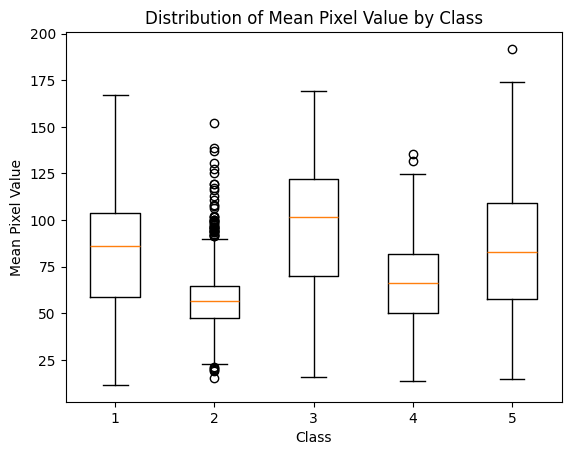

In [96]:
# now, summarize each image as just a mean value
# then, do the boxplot with regards to classes
X_mean = np.mean(X, axis=1)
plt.boxplot([X_mean[Y == label] for label in unique])
plt.xlabel('Class')
plt.ylabel('Mean Pixel Value')
plt.title('Distribution of Mean Pixel Value by Class')
plt.show()

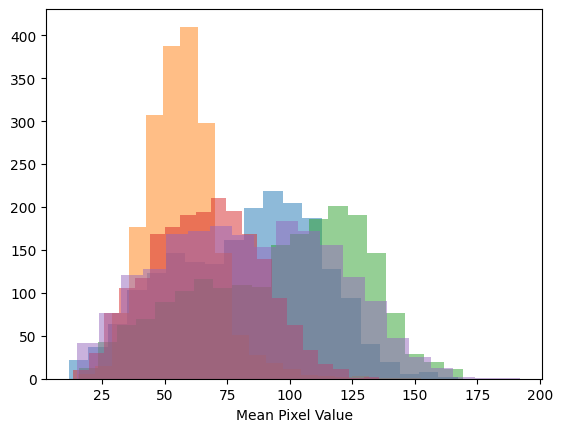

Classes 0 and 1 have significantly different mean pixel values
Classes 0 and 2 have significantly different mean pixel values
Classes 0 and 3 have significantly different mean pixel values
Classes 0 and 4 do not have significantly different mean pixel values
Classes 1 and 2 have significantly different mean pixel values
Classes 1 and 3 have significantly different mean pixel values
Classes 1 and 4 have significantly different mean pixel values
Classes 2 and 3 have significantly different mean pixel values
Classes 2 and 4 have significantly different mean pixel values
Classes 3 and 4 have significantly different mean pixel values


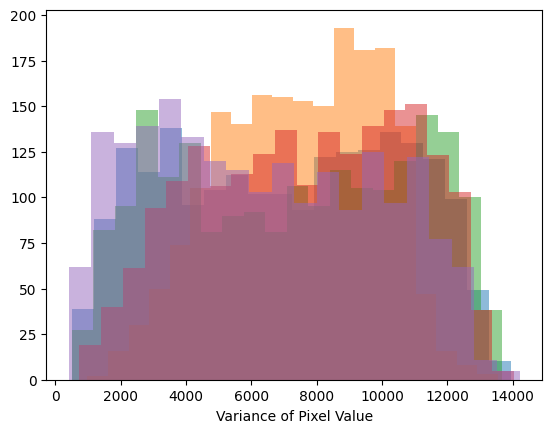

Classes 0 and 1 have significantly different variances of pixel values
Classes 0 and 2 have significantly different variances of pixel values
Classes 0 and 3 have significantly different variances of pixel values
Classes 0 and 4 have significantly different variances of pixel values
Classes 1 and 2 have significantly different variances of pixel values
Classes 1 and 3 do not have significantly different variances of pixel values
Classes 1 and 4 have significantly different variances of pixel values
Classes 2 and 3 have significantly different variances of pixel values
Classes 2 and 4 have significantly different variances of pixel values
Classes 3 and 4 have significantly different variances of pixel values


In [100]:
# now, show the distributions of classes' means of pixel values. These will follow a normal distribution as these are means of pixel values
for label in unique_labels:
    plt.hist(X_mean[Y == label], bins=20, alpha=0.5, label='Class {}'.format(label))
plt.xlabel('Mean Pixel Value')
plt.show()


# these follow a normal distribution, as expected
# we can do t-tests to see if the means are significantly different.
# under the null hypothesis, the means are the same

from scipy.stats import ttest_ind
for i in range(len(unique_labels)):
    for j in range(i+1, len(unique_labels)):
        class1 = X_mean[Y == i]
        class2 = X_mean[Y == j]
        t, p = ttest_ind(class1, class2)
        # if p < 0.05, we reject the null hypothesis that the means are the same
        if p < 0.05:
            print('Classes {} and {} have significantly different mean pixel values'.format(i, j))
        else:
            print('Classes {} and {} do not have significantly different mean pixel values'.format(i, j))

# now, show the distribution of classes' variance of pixel values. These will follow a chi-squared distribution as these are variances of pixel values
X_var = np.var(X, axis=1)
for label in unique_labels:
    plt.hist(X_var[Y == label], bins=20, alpha=0.5, label='Class {}'.format(label))
plt.xlabel('Variance of Pixel Value')
plt.show()

# these follow a chi-squared distribution, as expected
# we can do F-tests to see if the variances are significantly different.
# under the null hypothesis, the variances are the same

from scipy.stats import f_oneway
for i in range(len(unique_labels)):
    for j in range(i+1, len(unique_labels)):
        class1 = X_var[Y == i]
        class2 = X_var[Y == j]
        f, p = f_oneway(class1, class2)
        # if p < 0.05, we reject the null hypothesis that the variances are the same
        if p < 0.05:
            print('Classes {} and {} have significantly different variances of pixel values'.format(i, j))
        else:
            print('Classes {} and {} do not have significantly different variances of pixel values'.format(i, j))

As we have seen above - the mean and the variances follow the known distributions. Would it be possible to create a distribution which is in one direction normal whereas in second chi-squared? I don't think so. But maybe? The simplest way would be to just treat them as independent (mean from variance) but it's totally wrong. I believe there must be ready models to do so!

# Computing the templates
So, the ideas are: 
1. do the PCA reduction and then get the 'template' / 'heatmap'
2. get the 'template' / 'heatmap' and then do the PCA reduction

For now my naive assumption is, that the 'heatmap' is just mean, which can be later multiplied to get the values. With the pca

Start:

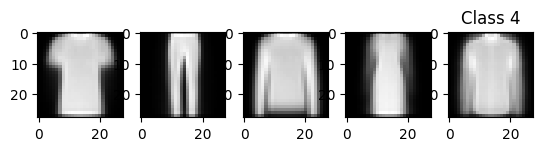

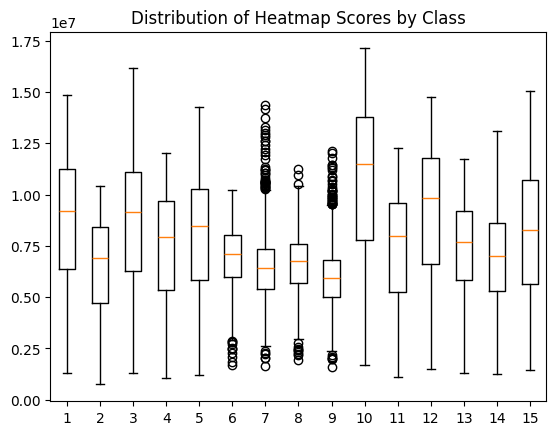

In [198]:
# get the 'heatmap' of the pixel values for each class
heatmaps = []
_, ax = plt.subplots(ncols=len(unique_labels))
for i, label in enumerate(unique_labels):
    heatmap = np.mean(X[Y == label], axis=0)
    heatmaps.append(heatmap)
    ax[i].imshow(heatmap.reshape((28,28)), cmap='gray')
    plt.title('Class {}'.format(label))
plt.show()
heatmaps = np.array(heatmaps)



# here I don't do entrywise multiplication first and then sum, I directly do the dot product. That won't be the case of reverse operations
heatmap_scores_after_pca = reduced_original_coordinates @ heatmaps.T


class_heatmap_scores_after_pca = []
for label1 in unique_labels:
    for label2 in [label1, *unique_labels[list(unique_labels).index(label1)+1:]]:
        class_heatmap_scores_after_pca.append(heatmap_scores_after_pca[Y == label1][:,label2])
plt.figure()
plt.boxplot(class_heatmap_scores_after_pca)
plt.title('Distribution of Heatmap Scores by Class')
plt.show()

From looking at the pictures: I think it could be a great feature, seriously!

From looking at the boxplots I think it could be a valuable tool for certin classes, but not for the first one apparently.

In [199]:

# second idea: do template matching with the heatmaps (so do the entrywise mutliplication first) and then do PCA and then do the dot product
# so first 'fit' the templates for each class

fitted_templates = X[np.newaxis, :, :] * heatmaps[:, np.newaxis, :]
fitted_templates=fitted_templates.reshape((5*10000, 784))

# pca on the fitted templates

heatmap_pca = PCA(n_components=71)
heatmap_pca_coordinates = pca.fit_transform(fitted_templates)
heatmap_reduced_original_coordinates = pca.inverse_transform(heatmap_pca_coordinates)

heatmap_reduced_original_coordinates = heatmap_reduced_original_coordinates.reshape((5, 10000, 784))
# now, take the sum of each heatmap (5) for each image (10000)
heatmap_scores_before_pca = np.sum(heatmap_reduced_original_coordinates, axis=2).T


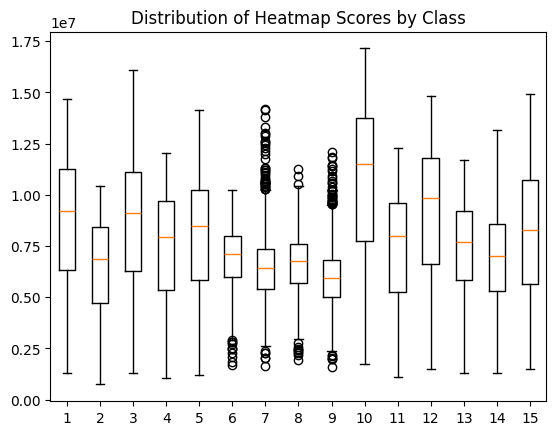

In [194]:
# now, we need to get boxplots again.
# so basically, the array is 5*10000 x 784
# it's composed by stacking 5 heatmaps of 10000 images, labels are in Y.
# I need to have 15 buckets, each against each other incl. itself. 
# so now it's about disassembling heatmap_reduced_original_coordinates

class_heatmap_scores_before_pca = []
for label1 in unique_labels:
    for label2 in [label1, *unique_labels[list(unique_labels).index(label1)+1:]]:
        class_heatmap_scores_before_pca.append(heatmap_scores_before_pca[Y == label1][:,label2])
plt.figure()
plt.boxplot(class_heatmap_scores_before_pca)
plt.title('Distribution of Heatmap Scores by Class')
plt.show()

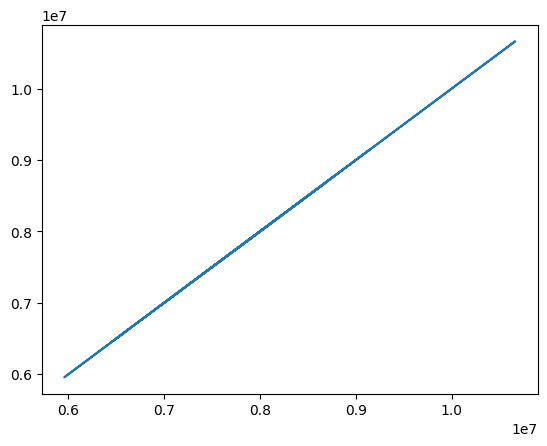

In [207]:
plt.plot([np.mean(x) for x in class_heatmap_scores_before_pca], [np.mean(x) for x in class_heatmap_scores_after_pca])

There is perfect correlation which makes obviously sense. So, there is no reason to do differently.